# RoboFlow DataSets

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 9.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import roboflow
roboflow.login()

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········


In [ ]:
rf = roboflow.Roboflow(api_key="IiKt5HkWlBmjBggoNDIn", model_format="yolov11")

In [ ]:
# dataset:
#     -train
#       -images (dog.png)
#       -labels (dog.txt)
#     -test
#     -valid
# label format:
# ["2","0.25","0.3","0.01","0.02"]
# index(class) x y width height

## DataSet1
https://universe.roboflow.com/1-bvex5/ggg-hml4j

In [ ]:
project = rf.workspace("danial-pxkht").project("ggg-hml4j-x5xkh")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ggg-1 in yolov11:: 100%|██████████| 7006/7006 [00:03<00:00, 1764.96it/s]


In [ ]:
original_classes= ['bed', 'big cabinet', 'bin', 'bunk bed', 'chair', 'couch', 'fan', 'footstool', 'fridge', 'hifi speaker', 'lamp', 'oven', 'painting', 'piano', 'plants', 'printer', 'small cabinet', 'table', 'tv', 'washing machine']
classes_to_remove = ['big cabinet', 'bin', 'bunk bed', "footstool", 'hifi speaker', 'painting', 'printer', 'small cabinet', "oven", "lamp", "piano", "plants", 'tv', 'washing machine']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


14
[1, 2, 3, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19]


In [ ]:
import os
import shutil

def filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, classes_to_remove):
    os.makedirs(output_dir_label, exist_ok=True)
    os.makedirs(output_dir_img, exist_ok=True)

    if os.path.exists(data_yaml_path_input):
        shutil.copy(data_yaml_path_input, data_yaml_path_output)
    else:
        print(f'The file {data_yaml_path_input} does not exist')

    for input_dir_label, input_dir_img in zip(input_dirs_label, input_dirs_img):
        for filename in os.listdir(input_dir_label):
            if filename.endswith('.txt'):
                label_path = os.path.join(input_dir_label, filename)
                image_path = os.path.join(input_dir_img, filename.replace('.txt', '.jpg'))

                if not os.path.exists(image_path):
                    continue

                with open(label_path, 'r') as file:
                    lines = file.readlines()

                filtered_lines = [line for line in lines if int(line.split()[0]) not in classes_to_remove]

                if filtered_lines:
                    with open(os.path.join(output_dir_label, filename), 'w') as file:
                        file.writelines(filtered_lines)
                    shutil.copy(image_path, output_dir_img)
                else:
                    print(f'Removed {image_path}')



In [ ]:
input_dirs_label = ['ggg-1/train/labels']
input_dirs_img = ['ggg-1/train/images']
output_dir_label = "/content/my_DS1/labels"
output_dir_img = "/content/my_DS1/images"
data_yaml_path_input = "/content/ggg-1/data.yaml"
data_yaml_path_output = "/content/my_DS1/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed ggg-1/train/images/rgb_47_png_jpg.rf.a1af808eb6054fdd35cd75ba0e97edb5.jpg
Removed ggg-1/train/images/pic_212_jpg.rf.2b65b612fe1913ea6094c62120f758fc.jpg
Removed ggg-1/train/images/rgb_2_png_jpg.rf.1e8bd31a218c7af93c3d1470fd2b09f2.jpg
Removed ggg-1/train/images/rgb_16_png_jpg.rf.a666e66840d8e248bd869816e8832f9d.jpg
Removed ggg-1/train/images/pic_564_jpg.rf.314eedff3be7c2e5226d1c7843e2bfa3.jpg
Removed ggg-1/train/images/rgb_29_png_jpg.rf.ccd6e53ddcfb54e9abbf5498d656d4b5.jpg
Removed ggg-1/train/images/rgb_18_png_jpg.rf.49162ba0b74ca5500fc0fc7d26c17a17.jpg
Removed ggg-1/train/images/rgb_15_png_jpg.rf.e3b4195a41939b4d57c4b7552165fdf3.jpg
Removed ggg-1/train/images/pic_542_jpg.rf.5749e80f4a997a8f6337120d9335aac6.jpg
Removed ggg-1/train/images/rgb_9_png_jpg.rf.4552ce6c7cfd3e579cd0a97fb1269bbb.jpg
Removed ggg-1/train/images/rgb_43_png_jpg.rf.c06ae0733e5c6eb0635d3ee626f85b1a.jpg
Removed ggg-1/train/images/rgb_12_png_jpg.rf.28931b699b1cba18aad002430881e892.jpg
Removed ggg-1/train/images/

In [ ]:
len(os.listdir(output_dir_img))

1488

## Dataset2
https://universe.roboflow.com/new-workspace-xbcxj/asia-furniture-image

In [ ]:
project = rf.workspace("danial-pxkht").project("asia-furniture-image-hhg8i")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Asia-Furniture-image-1 in yolov11:: 100%|██████████| 2132/2132 [00:01<00:00, 1800.36it/s]


In [ ]:
original_classes= ['air conditioner', 'arm chair', 'bed', 'carbinet', 'ceiling fan', 'chair', 'drawer near bed', 'hanging lights', 'lamp', 'makeup chair', 'master bed', 'men', 'photoframe', 'small table', 'sofa', 'stool', 'table', 'wardrobe', 'women']
classes_to_remove = ['air conditioner','arm chair', 'carbinet', 'ceiling fan', 'drawer near bed', 'hanging lights', 'lamp', 'makeup chair', 'photoframe', 'small table', 'wardrobe','master bed', 'men','stool', 'wardrobe', 'women']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


15
[0, 1, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 18]


In [ ]:
input_dirs_label = ['Asia-Furniture-image-1/train/labels', 'Asia-Furniture-image-1/test/labels', 'Asia-Furniture-image-1/valid/labels']
input_dirs_img = ['Asia-Furniture-image-1/train/images', 'Asia-Furniture-image-1/test/images', 'Asia-Furniture-image-1/valid/images']
output_dir_label = "/content/my_DS2/labels"
output_dir_img = "/content/my_DS2/images"
data_yaml_path_input = "/content/Asia-Furniture-image-1/data.yaml"
data_yaml_path_output = "/content/my_DS2/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed Asia-Furniture-image-1/train/images/110_aug_v1_lamp_8_jpg.rf.f4589e4401efacb7dc2ea39984cfd18f.jpg
Removed Asia-Furniture-image-1/train/images/236_aug_v1_drawernexttobed_45_jpg.rf.7204df6885c37deaeb6cb6c1ede73078.jpg
Removed Asia-Furniture-image-1/train/images/60_aug_v2_20220226_142113_jpg.rf.48c319d00331f06c38bb8aa8e25aee6d.jpg
Removed Asia-Furniture-image-1/train/images/20220226_105421_jpg.rf.e4f89f9f0454c47d6308872daf50c530.jpg
Removed Asia-Furniture-image-1/train/images/119_aug_v1_lamp_17_jpg.rf.5b765bc3688606d70d7b7cfb0f62ed46.jpg
Removed Asia-Furniture-image-1/train/images/106_aug_v2_lamp_4_jpg.rf.cc648183e0698ae3e970b62a7de72e35.jpg
Removed Asia-Furniture-image-1/train/images/45_aug_v1_20220226_141646_jpg.rf.604fe09dc0e927b3d85722df01071384.jpg
Removed Asia-Furniture-image-1/train/images/231_aug_v1_drawernexttobed_40_jpg.rf.4da55eb0a27236da037e0a238f8f86f8.jpg
Removed Asia-Furniture-image-1/train/images/lamp_51_jpg.rf.c3b5dbfc5afc8c907d6411305962bc15.jpg
Removed Asia-Furn

In [ ]:
len(os.listdir(output_dir_img))

431

## DataSet3
https://universe.roboflow.com/housing-images/housing-data

In [ ]:
project = rf.workspace("danial-pxkht").project("housing-data-jzphb")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Housing-Data-1 in yolov11:: 100%|██████████| 2012/2012 [00:00<00:00, 4423.48it/s]


In [ ]:
original_classes= ['Bed', 'Bed_Bunk', 'Bench', 'Chair_Arm', 'Chair_Dining', 'Dresser', 'Sofa', 'Table_Coffee', 'Table_Dining']
classes_to_remove = ['Bed_Bunk', 'Chair_Arm', 'Chair_Dining', 'Table_Coffee', 'Dresser']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


5
[1, 3, 4, 5, 7]


In [ ]:
input_dirs_label = ['Housing-Data-1/train/labels', 'Housing-Data-1/test/labels', 'Housing-Data-1/valid/labels']
input_dirs_img = ['Housing-Data-1/train/images', 'Housing-Data-1/test/images', 'Housing-Data-1/valid/images']
output_dir_label = "/content/my_DS3/labels"
output_dir_img = "/content/my_DS3/images"
data_yaml_path_input = "/content/Housing-Data-1/data.yaml"
data_yaml_path_output = "/content/my_DS3/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed Housing-Data-1/train/images/rgb_87_png.rf.e3b0db35ca5298adbfcab6eaa33a9693.jpg
Removed Housing-Data-1/train/images/rgb_328_png.rf.769813cac4d841f975a836502cd2c50c.jpg
Removed Housing-Data-1/train/images/rgb_1093_png.rf.b42bf428df4beb9f2f6dfd48e7ce6050.jpg
Removed Housing-Data-1/train/images/rgb_1104_png.rf.e0ed8aa270ad26c84dd99eefee48406e.jpg
Removed Housing-Data-1/train/images/rgb_1042_png.rf.9037c489b834c15a3a48e6827cc632e7.jpg
Removed Housing-Data-1/train/images/rgb_939_png.rf.0c66f73f6721b46cc9afee70cc740ed5.jpg
Removed Housing-Data-1/train/images/rgb_544_png.rf.b1fbfada424b6ae4cafef777f1a37417.jpg
Removed Housing-Data-1/train/images/rgb_703_png.rf.74fa0a5539bedb092947f3d777238c85.jpg
Removed Housing-Data-1/train/images/rgb_926_png.rf.3015d00d08b82baae43365a6257579e6.jpg
Removed Housing-Data-1/train/images/rgb_498_png.rf.4937bd4421fdf474e57caa877804567b.jpg
Removed Housing-Data-1/train/images/rgb_9_png.rf.b338c45bdaff52b8333a69ce59531909.jpg
Removed Housing-Data-1/train/ima

In [ ]:
len(os.listdir(output_dir_img))

573

## DataSet4
https://universe.roboflow.com/roboflow-100/furniture-ngpea

In [ ]:
project = rf.workspace("danial-pxkht").project("furniture-ngpea-l4g9s")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to furniture-1 in yolov11:: 100%|██████████| 1390/1390 [00:00<00:00, 4020.02it/s]


In [ ]:
original_classes = ['Chair', 'Sofa', 'Table'] # all classes are needed
indexes_classes_to_remove = []

In [ ]:
input_dirs_label = ['furniture-1/train/labels', 'furniture-1/test/labels', 'furniture-1/valid/labels']
input_dirs_img = ['furniture-1/train/images', 'furniture-1/test/images', 'furniture-1/valid/images']
output_dir_label = "/content/my_DS4/labels"
output_dir_img = "/content/my_DS4/images"
data_yaml_path_input = "/content/furniture-1/data.yaml"
data_yaml_path_output = "/content/my_DS4/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

In [ ]:
len(os.listdir(output_dir_img))

689

## DataSet5
https://universe.roboflow.com/vision-help/furniture-appcw

In [ ]:
project = rf.workspace("danial-pxkht").project("furniture-appcw-ahk3e")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Furniture-1 in yolov11:: 100%|██████████| 1840/1840 [00:00<00:00, 5459.16it/s]


In [ ]:
original_classes= ['Bed', 'Chair', 'Closet', 'Computer', 'Door', 'Monitor', 'Shelf', 'Sofa', 'Table', 'Window']
classes_to_remove = ['Computer','Monitor', 'Shelf','Window']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


4
[3, 5, 6, 9]


In [ ]:
input_dirs_label = ['Furniture-1/train/labels']
input_dirs_img = ['Furniture-1/train/images']
output_dir_label = "/content/my_DS5/labels"
output_dir_img = "/content/my_DS5/images"
data_yaml_path_input = "/content/Furniture-1/data.yaml"
data_yaml_path_output = "/content/my_DS5/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed Furniture-1/train/images/000334_jpg.rf.cd303357f475b611ff29565845e877ea.jpg
Removed Furniture-1/train/images/300182_jpg.rf.5fac44115eb63f9c9c04184d2acedb07.jpg
Removed Furniture-1/train/images/000366_jpg.rf.63e9dd18cd38ceede79facc1aacec0aa.jpg
Removed Furniture-1/train/images/clean_unclean_window10_jpeg.rf.c58c4dcd3bb378a83067e28b1820d6fe.jpg
Removed Furniture-1/train/images/200092_jpg.rf.0a093e8772ce0df8989e9a56e4c44546.jpg
Removed Furniture-1/train/images/clean_unclean_window17_jpeg.rf.613e72b2dbed413709943575923a96cf.jpg
Removed Furniture-1/train/images/000403_jpg.rf.66333f351ea8dee1e86554f73215e652.jpg
Removed Furniture-1/train/images/200007_jpg.rf.d9826b84e89ecdf82ead6e6db714dd03.jpg
Removed Furniture-1/train/images/clean_unclean_window5_jpeg.rf.adddbcf527177dd68061b6a372ad09c7.jpg
Removed Furniture-1/train/images/google_0002_jpg.rf.0656b90a86236d0f5b41648147b7936c.jpg
Removed Furniture-1/train/images/000345_jpg.rf.02c03363ccebc2e7836e3d2828a08f77.jpg
Removed Furniture-1/t

In [ ]:
len(os.listdir(output_dir_img))

681

## DataSet6
https://universe.roboflow.com/group10textdetect/stair-detect

In [ ]:
project = rf.workspace("danial-pxkht").project("stair-detect-zhzio")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to stair-detect-1 in yolov11:: 100%|██████████| 220/220 [00:00<00:00, 4694.05it/s]


In [ ]:
original_classes = ['bench', 'bicycle', 'car', 'cat', 'chair', 'dog', 'door', 'electric fan', 'gate', 'monoblock chair', 'motorcycle', 'pedestrian', 'person', 'plastic bottle', 'plotted plants', 'pole', 'stairs']
classes_to_remove = ['dog','gate', 'monoblock chair', 'pedestrian', 'plotted plants', 'pole']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


6
[5, 8, 9, 11, 14, 15]


In [ ]:
input_dirs_label = ['stair-detect-1/train/labels', 'stair-detect-1/test/labels', 'stair-detect-1/valid/labels']
input_dirs_img = ['stair-detect-1/train/images', 'stair-detect-1/test/images', 'stair-detect-1/valid/images']
output_dir_label = "/content/my_DS6/labels"
output_dir_img = "/content/my_DS6/images"
data_yaml_path_input = "/content/stair-detect-1/data.yaml"
data_yaml_path_output = "/content/my_DS6/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed stair-detect-1/valid/images/20210308_16_38_25_000_1WUU29gdsePbS1RDIy5monkVyQc2_T_2128_4608-jpg_jpg.rf.de4e1216ef6d925453f8efd695130a7a.jpg


In [ ]:
len(os.listdir(output_dir_img))

103

## DataSet7
https://universe.roboflow.com/stair-eyhvv/stairs-detection-6cq2a

In [ ]:
project = rf.workspace("danial-pxkht").project("stairs-detection-6cq2a-9jbd9")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Stairs-Detection-1 in yolov11:: 100%|██████████| 248/248 [00:00<00:00, 5127.89it/s]


In [ ]:
original_classes = ['stairsdown', 'stairsup'] # no need to delete any samples
indexes_classes_to_remove = []

In [ ]:
input_dirs_label = ['Stairs-Detection-1/train/labels', 'Stairs-Detection-1/test/labels', 'Stairs-Detection-1/valid/labels']
input_dirs_img = ['Stairs-Detection-1/train/images', 'Stairs-Detection-1/test/images', 'Stairs-Detection-1/valid/images']
output_dir_label = "/content/my_DS7/labels"
output_dir_img = "/content/my_DS7/images"
data_yaml_path_input = "/content/Stairs-Detection-1/data.yaml"
data_yaml_path_output = "/content/my_DS7/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed Stairs-Detection-1/train/images/img106_jpg.rf.c40039821420d3cebd0812a96d1e0991.jpg
Removed Stairs-Detection-1/train/images/img34_jpg.rf.ba9348c86d9ac3d5d7e2a2a2dee24666.jpg
Removed Stairs-Detection-1/train/images/img107_jpg.rf.6bcdf4aa34d6fb8f83e441f2bab98c7d.jpg
Removed Stairs-Detection-1/test/images/img49_jpg.rf.12636d3498c26f7441ecf7fce81e7221.jpg
Removed Stairs-Detection-1/valid/images/img68_jpg.rf.4c6d7ad057427ad85ea298fe338e4e4f.jpg


In [ ]:
len(os.listdir(output_dir_img))

113

## DataSet8
https://universe.roboflow.com/madra-opicn/crosswalk-g868a-ktmqi

In [ ]:
project = rf.workspace("danial-pxkht").project("crosswalk-g868a-ktmqi-c9vk6")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crosswalk-1 in yolov11:: 100%|██████████| 6428/6428 [00:02<00:00, 2982.62it/s]


In [ ]:
original_classes = ['crosswalk', 'door', 'pedestrian', 'stair'] # no need to delete any samples
indexes_classes_to_remove = []

In [ ]:
input_dirs_label = ['crosswalk-1/train/labels', 'crosswalk-1/test/labels', 'crosswalk-1/valid/labels']
input_dirs_img = ['crosswalk-1/train/images', 'crosswalk-1/test/images', 'crosswalk-1/valid/images']
output_dir_label = "/content/my_DS8/labels"
output_dir_img = "/content/my_DS8/images"
data_yaml_path_input = "/content/crosswalk-1/data.yaml"
data_yaml_path_output = "/content/my_DS8/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

## DataSet9
https://universe.roboflow.com/ono-gedd7/pedestrian-traffic-light-puf4a

In [ ]:
project = rf.workspace("danial-pxkht").project("pedestrian-traffic-light-puf4a-dezix")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to pedestrian-Traffic-Light-1 in yolov11:: 100%|██████████| 1864/1864 [00:00<00:00, 3726.44it/s]


In [ ]:
original_classes = ['green', 'pedestrian Traffic Light', 'red', 'signal-light']
classes_to_remove = ['pedestrian Traffic Light']
indexes_classes_to_remove = [i for i, x in enumerate(original_classes) if x in classes_to_remove]
print(len(indexes_classes_to_remove))
print(indexes_classes_to_remove)


1
[1]


In [ ]:
input_dirs_label = ['pedestrian-Traffic-Light-1/train/labels', 'pedestrian-Traffic-Light-1/test/labels', 'pedestrian-Traffic-Light-1/valid/labels']
input_dirs_img = ['pedestrian-Traffic-Light-1/train/images', 'pedestrian-Traffic-Light-1/test/images', 'pedestrian-Traffic-Light-1/valid/images']
output_dir_label = "/content/my_DS9/labels"
output_dir_img = "/content/my_DS9/images"
data_yaml_path_input = "/content/pedestrian-Traffic-Light-1/data.yaml"
data_yaml_path_output = "/content/my_DS9/data.yaml"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, data_yaml_path_input, data_yaml_path_output, indexes_classes_to_remove)

Removed pedestrian-Traffic-Light-1/train/images/082_jpg.rf.f479704c09470b98394eefd53a30a812.jpg
Removed pedestrian-Traffic-Light-1/train/images/signal-light-87-_jpg.rf.30351cf72a26592e56ca6092deb40329.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_317_jpg.rf.06b6461b23044eb8d10e8202bb80aeb3.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_090_jpg.rf.dfa82d66c20295a6f5925f3c169c33f8.jpg
Removed pedestrian-Traffic-Light-1/train/images/signal-light-103-_jpg.rf.577c2461410b5f559eae4d992250cf12.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_229_jpg.rf.402466b9437c41b029bca45e3e9cf8e0.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_143_jpg.rf.b3ca272b0d53ed18de1d781b28bb391a.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_064_jpg.rf.1a3d0e74d4eb4d6fb9dd43d24bc48f2d.jpg
Removed pedestrian-Traffic-Light-1/train/images/green_036_jpg.rf.4ea7bf5268d992c426c8f58bac11efe2.jpg
Removed pedestrian-Traffic-Light-1/train/images/signal-light-86-_jpg.rf.a

In [ ]:
len(os.listdir(output_dir_img))

821

## Zip the data

In [ ]:
import shutil
import os

def move_folder(source_folder_path, destination_folder_path):
    os.makedirs(destination_folder_path, exist_ok=True)

    shutil.move(source_folder_path, destination_folder_path)


folders_to_zip = ['my_DS1', 'my_DS2', 'my_DS3', 'my_DS4', 'my_DS5', 'my_DS6', 'my_DS7', 'my_DS8', 'my_DS9']

for fol in folders_to_zip:
  source_folder_path = f"/content/{fol}"
  destination_folder_path = f'RoboFlow_datasets/{fol}'
  move_folder(source_folder_path, destination_folder_path)


In [ ]:
import os
import zipfile

def zip_folders(main_folder_path, output_zip_file):
    with zipfile.ZipFile(output_zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for folder_name in os.listdir(main_folder_path):
            folder_path = os.path.join(main_folder_path, folder_name)
            if os.path.isdir(folder_path):
                for root, dirs, files in os.walk(folder_path):
                    for file in files:
                        file_path = os.path.join(root, file)
                        arcname = os.path.relpath(file_path, main_folder_path)
                        zipf.write(file_path, arcname)



In [ ]:
main_folder_path = '/content/RoboFlow_datasets'
output_zip_file = 'Robo_flow_dataset.zip'
zip_folders(main_folder_path, output_zip_file)


In [ ]:
zip_size = os.path.getsize("Robo_flow_dataset.zip")
print(f'Zip file size: {zip_size} bytes')

Zip file size: 439311529 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
src_file_path = '/content/Robo_flow_dataset.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/Robo_flow_dataset.zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)
print(f'Successfully moved {src_file_path} to {dest_file_path}')


Successfully moved /content/Robo_flow_dataset.zip to /content/drive/MyDrive/smart_glasses/Robo_flow_dataset.zip


# Kaggle DataSets

In [ ]:
import shutil
import os
import kagglehub

## Faces Dataset
https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset

In [ ]:
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")

print("Path to dataset files:", path)



source_path = path
destination_path = '/content/'

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

shutil.move(source_path, destination_path)

print(f"Data moved from {source_path} to {destination_path}")


100%|██████████| 4.43G/4.43G [00:51<00:00, 93.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3
Data moved from /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3 to /content/


In [ ]:
import shutil

In [ ]:
shutil.copytree("/content/3/images/val", "/content/my_DS10(faces)/images/")

'/content/my_DS10(faces)/images/'

In [ ]:
shutil.copytree("/content/3/labels/val", "/content/my_DS10(faces)/labels/")

'/content/my_DS10(faces)/labels/'

In [ ]:
from PIL import Image

def resize_images_in_folder(folder_path, new_size):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                img = img.resize(new_size)
                img.save(image_path)
                print(f'Resized and saved {filename}')



In [ ]:
folder_path = '/content/my_DS10(faces)/images'
new_size = (640, 640)

resize_images_in_folder(folder_path, new_size)

Resized and saved c66860648d696c0b.jpg
Resized and saved 57a5af690baadf96.jpg
Resized and saved 320c5c1eda882373.jpg
Resized and saved fc0122d0e2743f26.jpg
Resized and saved 090aa8acb7def106.jpg
Resized and saved e45be2620362aa58.jpg
Resized and saved a8d44c9d5bb069ca.jpg
Resized and saved 54b76da9a1a6bb9b.jpg
Resized and saved 53131fa064f6fca6.jpg
Resized and saved 2134edc7c6e59ee2.jpg
Resized and saved c008b8dd62e6a80d.jpg
Resized and saved d39800c001ef5244.jpg
Resized and saved 19b83a8ddeac7193.jpg
Resized and saved 71c64a4fa154c65c.jpg
Resized and saved 6969d3adcbd0dd02.jpg
Resized and saved af6b5cdd285423fd.jpg
Resized and saved 65242b6cb4d02b0c.jpg
Resized and saved 63d2f525226b237a.jpg
Resized and saved ba0eb80192df715f.jpg
Resized and saved d9872054eb7fb6fc.jpg
Resized and saved a65c8a93f2f1b01f.jpg
Resized and saved ddd8150c4759f5f7.jpg
Resized and saved efcb051384e3ee7c.jpg
Resized and saved 7812e4b10f115626.jpg
Resized and saved 679a4452db1e46e7.jpg
Resized and saved 37a5bdf

In [ ]:
shutil.make_archive("/content/my_DS10", 'zip', "/content/my_DS10(faces)")

'/content/my_DS10.zip'

In [ ]:
zip_size = os.path.getsize("my_DS10.zip")
print(f'Zip file size: {zip_size} bytes')

Zip file size: 177014600 bytes


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
src_file_path = '/content/my_DS10.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/my_DS10(faces).zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)
print(f'Successfully moved {src_file_path} to {dest_file_path}')


Successfully moved /content/my_DS10.zip to /content/drive/MyDrive/smart_glasses/my_DS10(faces).zip


## Hands Gestures Dataset
https://www.kaggle.com/datasets/kapillondhe/american-sign-language

In [ ]:
path = kagglehub.dataset_download("kapillondhe/american-sign-language")

print("Path to dataset files:", path)



source_path = path
destination_path = '/content/'

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

shutil.move(source_path, destination_path)

print(f"Data moved from {source_path} to {destination_path}")


100%|██████████| 4.64G/4.64G [03:00<00:00, 27.6MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kapillondhe/american-sign-language/versions/1
Data moved from /root/.cache/kagglehub/datasets/kapillondhe/american-sign-language/versions/1 to /content/


In [ ]:
from PIL import Image

def resize_images_in_folder(folder_path, new_path, new_size):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(folder_path, filename)
            image_save_path = os.path.join(new_path, filename)
            with Image.open(image_path) as img:
                img = img.resize(new_size)
                img.save(image_save_path)
                print(f'Resized and saved {filename}')



In [ ]:
folder_path = '/content/1/ASL_Dataset/Train/A'
new_path = "/content/hands_gestures/A"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Streaming output truncated to the last 5000 lines.
Resized and saved A1627.jpg
Resized and saved A2702.jpg
Resized and saved A2687.jpg
Resized and saved A2971.jpg
Resized and saved 1571.jpg
Resized and saved 1609.jpg
Resized and saved 376.jpg
Resized and saved A2852.jpg
Resized and saved A2582.jpg
Resized and saved 1762.jpg
Resized and saved A912.jpg
Resized and saved 32.jpg
Resized and saved A428.jpg
Resized and saved A2709.jpg
Resized and saved A1290.jpg
Resized and saved A2157.jpg
Resized and saved A1336.jpg
Resized and saved 2354.jpg
Resized and saved 1242.jpg
Resized and saved 861.jpg
Resized and saved 2164.jpg
Resized and saved 450.jpg
Resized and saved A113.jpg
Resized and saved 2778.jpg
Resized and saved A352.jpg
Resized and saved 2703.jpg
Resized and saved 1876.jpg
Resized and saved 562.jpg
Resized and saved A1921.jpg
Resized and saved A1232.jpg
Resized and saved 2726.jpg
Resized and saved 2409.jpg
Resized and saved 926.jpg
Resized and saved A334.jpg
Resized and saved A1801.jp

In [ ]:
folder_path = '/content/1/ASL_Dataset/Train/B'
new_path = "/content/hands_gestures/B"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Streaming output truncated to the last 5000 lines.
Resized and saved 861.jpg
Resized and saved 2164.jpg
Resized and saved B2820.jpg
Resized and saved B169.jpg
Resized and saved B2347.jpg
Resized and saved B2639.jpg
Resized and saved B1763.jpg
Resized and saved B2033.jpg
Resized and saved 450.jpg
Resized and saved 2778.jpg
Resized and saved 2703.jpg
Resized and saved 1876.jpg
Resized and saved 562.jpg
Resized and saved B98.jpg
Resized and saved 2726.jpg
Resized and saved 2409.jpg
Resized and saved B1606.jpg
Resized and saved 926.jpg
Resized and saved B1308.jpg
Resized and saved 1565.jpg
Resized and saved 997.jpg
Resized and saved 2836.jpg
Resized and saved 1591.jpg
Resized and saved B2023.jpg
Resized and saved 2956.jpg
Resized and saved 2553.jpg
Resized and saved B2705.jpg
Resized and saved 729.jpg
Resized and saved B2231.jpg
Resized and saved 2745.jpg
Resized and saved B303.jpg
Resized and saved B2635.jpg
Resized and saved 523.jpg
Resized and saved 1731.jpg
Resized and saved 412.jpg
Re

In [ ]:
folder_path = '/content/1/ASL_Dataset/Train/W'
new_path = "/content/hands_gestures/W"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Streaming output truncated to the last 5000 lines.
Resized and saved W1643.jpg
Resized and saved W598.jpg
Resized and saved 2745.jpg
Resized and saved W585.jpg
Resized and saved 523.jpg
Resized and saved 1731.jpg
Resized and saved 412.jpg
Resized and saved W1674.jpg
Resized and saved 570.jpg
Resized and saved 398.jpg
Resized and saved W107.jpg
Resized and saved 1374.jpg
Resized and saved 2869.jpg
Resized and saved W722.jpg
Resized and saved 1839.jpg
Resized and saved 1069.jpg
Resized and saved 8.jpg
Resized and saved W53.jpg
Resized and saved W492.jpg
Resized and saved 2315.jpg
Resized and saved W1649.jpg
Resized and saved 1860.jpg
Resized and saved 1133.jpg
Resized and saved W367.jpg
Resized and saved W2189.jpg
Resized and saved 1021.jpg
Resized and saved W2723.jpg
Resized and saved W2557.jpg
Resized and saved W1888.jpg
Resized and saved W2117.jpg
Resized and saved 869.jpg
Resized and saved 2757.jpg
Resized and saved 2250.jpg
Resized and saved W2536.jpg
Resized and saved W1764.jpg
Res

In [ ]:
folder_path = '/content/1/ASL_Dataset/Train/Y'
new_path = "/content/hands_gestures/Y"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Streaming output truncated to the last 5000 lines.
Resized and saved Y1363.jpg
Resized and saved 2945.jpg
Resized and saved Y340.jpg
Resized and saved 2139.jpg
Resized and saved 1266.jpg
Resized and saved 950.jpg
Resized and saved 964.jpg
Resized and saved 1263.jpg
Resized and saved 1195.jpg
Resized and saved 1088.jpg
Resized and saved Y1562.jpg
Resized and saved 1248.jpg
Resized and saved Y640.jpg
Resized and saved Y1615.jpg
Resized and saved Y1439.jpg
Resized and saved Y2170.jpg
Resized and saved 760.jpg
Resized and saved 2770.jpg
Resized and saved Y1636.jpg
Resized and saved 1559.jpg
Resized and saved 649.jpg
Resized and saved Y160.jpg
Resized and saved 2100.jpg
Resized and saved Y2304.jpg
Resized and saved Y2073.jpg
Resized and saved 462.jpg
Resized and saved Y2901.jpg
Resized and saved 1756.jpg
Resized and saved 1733.jpg
Resized and saved Y1003.jpg
Resized and saved Y2242.jpg
Resized and saved Y1710.jpg
Resized and saved Y1850.jpg
Resized and saved Y2603.jpg
Resized and saved Y172

In [ ]:
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)


In [ ]:
source_path = path
destination_path = '/content/hands'

if not os.path.exists(destination_path):
    os.makedirs(destination_path)

shutil.move(source_path, destination_path)

print(f"Data moved from {source_path} to {destination_path}")

Data moved from /root/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1 to /content/hands


In [ ]:
folder_path = '/content/hands/1/asl_alphabet_train/asl_alphabet_train/A'
new_path = "/content/hands_gestures/A"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Resized and saved A2361.jpg
Resized and saved A2592.jpg
Resized and saved A841.jpg
Resized and saved A2556.jpg
Resized and saved A2727.jpg
Resized and saved A512.jpg
Resized and saved A1751.jpg
Resized and saved A747.jpg
Resized and saved A2654.jpg
Resized and saved A1282.jpg
Resized and saved A1161.jpg
Resized and saved A863.jpg
Resized and saved A2123.jpg
Resized and saved A2107.jpg
Resized and saved A1701.jpg
Resized and saved A471.jpg
Resized and saved A1476.jpg
Resized and saved A1068.jpg
Resized and saved A2401.jpg
Resized and saved A1859.jpg
Resized and saved A2626.jpg
Resized and saved A2649.jpg
Resized and saved A848.jpg
Resized and saved A855.jpg
Resized and saved A1132.jpg
Resized and saved A742.jpg
Resized and saved A2010.jpg
Resized and saved A1077.jpg
Resized and saved A1664.jpg
Resized and saved A1067.jpg
Resized and saved A2009.jpg
Resized and saved A2502.jpg
Resized and saved A2726.jpg
Resized and saved A260.jpg
Resized and saved A1816.jpg
Resized and saved A1062.jpg
R

In [ ]:
folder_path = '/content/hands/1/asl_alphabet_train/asl_alphabet_train/B'
new_path = "/content/hands_gestures/B"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Resized and saved B2350.jpg
Resized and saved B1237.jpg
Resized and saved B1387.jpg
Resized and saved B109.jpg
Resized and saved B2759.jpg
Resized and saved B337.jpg
Resized and saved B1997.jpg
Resized and saved B1054.jpg
Resized and saved B1059.jpg
Resized and saved B1279.jpg
Resized and saved B1601.jpg
Resized and saved B1216.jpg
Resized and saved B2527.jpg
Resized and saved B1106.jpg
Resized and saved B2957.jpg
Resized and saved B950.jpg
Resized and saved B1843.jpg
Resized and saved B320.jpg
Resized and saved B1953.jpg
Resized and saved B527.jpg
Resized and saved B435.jpg
Resized and saved B2320.jpg
Resized and saved B1283.jpg
Resized and saved B2818.jpg
Resized and saved B1212.jpg
Resized and saved B344.jpg
Resized and saved B565.jpg
Resized and saved B1036.jpg
Resized and saved B1161.jpg
Resized and saved B2907.jpg
Resized and saved B2343.jpg
Resized and saved B1192.jpg
Resized and saved B171.jpg
Resized and saved B1523.jpg
Resized and saved B2518.jpg
Resized and saved B318.jpg
Re

In [ ]:
folder_path = '/content/hands/1/asl_alphabet_train/asl_alphabet_train/W'
new_path = "/content/hands_gestures/W"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Resized and saved W545.jpg
Resized and saved W1366.jpg
Resized and saved W2633.jpg
Resized and saved W443.jpg
Resized and saved W963.jpg
Resized and saved W2540.jpg
Resized and saved W934.jpg
Resized and saved W2361.jpg
Resized and saved W1247.jpg
Resized and saved W2082.jpg
Resized and saved W2282.jpg
Resized and saved W2522.jpg
Resized and saved W1875.jpg
Resized and saved W950.jpg
Resized and saved W2309.jpg
Resized and saved W214.jpg
Resized and saved W2783.jpg
Resized and saved W2697.jpg
Resized and saved W1212.jpg
Resized and saved W1160.jpg
Resized and saved W1594.jpg
Resized and saved W1678.jpg
Resized and saved W864.jpg
Resized and saved W2187.jpg
Resized and saved W2830.jpg
Resized and saved W1801.jpg
Resized and saved W2878.jpg
Resized and saved W1975.jpg
Resized and saved W1145.jpg
Resized and saved W2479.jpg
Resized and saved W49.jpg
Resized and saved W1218.jpg
Resized and saved W2635.jpg
Resized and saved W1877.jpg
Resized and saved W2128.jpg
Resized and saved W1342.jpg
R

In [ ]:
folder_path = '/content/hands/1/asl_alphabet_train/asl_alphabet_train/Y'
new_path = "/content/hands_gestures/Y"
new_size = (640, 640)

resize_images_in_folder(folder_path, new_path, new_size)

Resized and saved Y1908.jpg
Resized and saved Y1816.jpg
Resized and saved Y366.jpg
Resized and saved Y1604.jpg
Resized and saved Y813.jpg
Resized and saved Y2534.jpg
Resized and saved Y2555.jpg
Resized and saved Y1896.jpg
Resized and saved Y2699.jpg
Resized and saved Y1914.jpg
Resized and saved Y2691.jpg
Resized and saved Y1108.jpg
Resized and saved Y2433.jpg
Resized and saved Y466.jpg
Resized and saved Y1194.jpg
Resized and saved Y578.jpg
Resized and saved Y2431.jpg
Resized and saved Y2597.jpg
Resized and saved Y2357.jpg
Resized and saved Y1538.jpg
Resized and saved Y1187.jpg
Resized and saved Y2257.jpg
Resized and saved Y1310.jpg
Resized and saved Y2552.jpg
Resized and saved Y1288.jpg
Resized and saved Y2726.jpg
Resized and saved Y374.jpg
Resized and saved Y1151.jpg
Resized and saved Y2201.jpg
Resized and saved Y2791.jpg
Resized and saved Y1526.jpg
Resized and saved Y899.jpg
Resized and saved Y193.jpg
Resized and saved Y588.jpg
Resized and saved Y2671.jpg
Resized and saved Y480.jpg
R

In [ ]:
shutil.make_archive("/content/hands_gestures", 'zip', "/content/hands_gestures")

'/content/hands_gestures.zip'

In [ ]:
zip_size = os.path.getsize("hands_gestures.zip")
print(f'Zip file size: {zip_size} bytes')

Zip file size: 503567937 bytes


In [ ]:
src_file_path = '/content/hands_gestures.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/my_DS11(hands_gestures).zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)
print(f'Successfully moved {src_file_path} to {dest_file_path}')


Successfully moved /content/hands_gestures.zip to /content/drive/MyDrive/smart_glasses/my_DS11(hands_gestures).zip


# pre-processing the datasets

In [ ]:
our_DS_classes = ["bed",
                  "desk",
                  "table",
                  "door",
                  "fridge",
                  "toilet",
                  "sofa",
                  "sink",
                  "microwave",
                  "chair",
                  "fan",
                  "closet",
                  "stairs",
                  "crosswalk",
                  "pedestrian Traffic Light (walk)",
                  "pedestrian Traffic Light (stop)",
                  "person",
                  "bicycle",
                  "car",
                  "motorcycle",
                  "bus",
                  "bench",
                  "faces",
                  "A",
                  "B",
                  "W",
                  "Y"]

## RoboFlow Datasets

### DS1

In [ ]:
original_classes= ['bed', 'big cabinet', 'bin', 'bunk bed', 'chair', 'couch', 'fan', 'footstool', 'fridge', 'hifi speaker', 'lamp', 'oven', 'painting', 'piano', 'plants', 'printer', 'small cabinet', 'table', 'tv', 'washing machine']
classes_to_remove = ['big cabinet', 'bin', 'bunk bed', "footstool", 'hifi speaker', 'painting', 'printer', 'small cabinet', "oven", "lamp", "piano", "plants", 'tv', 'washing machine']
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
indexes_classes_to_keep

[0, 4, 5, 6, 8, 17]

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['bed', 'chair', 'couch', 'fan', 'fridge', 'table']

In [ ]:
new_index_for_DS1 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS1[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

couch  :  5


In [ ]:
new_index_for_DS1

{0: 0, 4: 9, 6: 10, 8: 4, 17: 2}

In [ ]:
new_index_for_DS1[5] = our_DS_classes.index("sofa")

In [ ]:
new_index_for_DS1

{0: 0, 4: 9, 6: 10, 8: 4, 17: 2, 5: 6}

### DS2

In [ ]:
original_classes= ['air conditioner', 'arm chair', 'bed', 'carbinet', 'ceiling fan', 'chair', 'drawer near bed', 'hanging lights', 'lamp', 'makeup chair', 'master bed', 'men', 'photoframe', 'small table', 'sofa', 'stool', 'table', 'wardrobe', 'women']
classes_to_remove = ['air conditioner','arm chair', 'carbinet', 'ceiling fan', 'drawer near bed', 'hanging lights', 'lamp', 'makeup chair', 'photoframe', 'small table', 'wardrobe','master bed', 'men','stool', 'wardrobe', 'women']
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
indexes_classes_to_keep

[2, 5, 14, 16]

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['bed', 'chair', 'sofa', 'table']

In [ ]:
new_index_for_DS2 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS2[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

In [ ]:
new_index_for_DS2

{2: 0, 5: 9, 14: 6, 16: 2}

### DS3

In [ ]:
original_classes= ['bed', 'Bed_Bunk', 'bench', 'Chair_Arm', 'Chair_Dining', 'Dresser', 'sofa', 'Table_Coffee', 'table']
classes_to_remove = ['Bed_Bunk', 'Chair_Arm', 'Chair_Dining', 'Table_Coffee', 'Dresser']
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
indexes_classes_to_keep

[0, 2, 6, 8]

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['bed', 'bench', 'sofa', 'table']

In [ ]:
new_index_for_DS3 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS3[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

In [ ]:
new_index_for_DS3

{0: 0, 2: 21, 6: 6, 8: 2}

### DS4

In [ ]:
original_classes = ['chair', 'sofa', 'table']
indexes_classes_to_keep = range(len(original_classes))

In [ ]:
indexes_classes_to_keep

range(0, 3)

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['chair', 'sofa', 'table']

In [ ]:
new_index_for_DS4 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS4[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

In [ ]:
new_index_for_DS4

{0: 9, 1: 6, 2: 2}

### DS5

In [ ]:
original_classes= ['bed', 'chair', 'closet', 'Computer', 'door', 'Monitor', 'Shelf', 'sofa', 'table', 'Window']
classes_to_remove = ['Computer','Monitor', 'Shelf','Window']

In [ ]:
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
indexes_classes_to_keep

[0, 1, 2, 4, 7, 8]

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['bed', 'chair', 'closet', 'door', 'sofa', 'table']

In [ ]:
new_index_for_DS5 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS5[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

In [ ]:
new_index_for_DS5

{0: 0, 1: 9, 2: 11, 4: 3, 7: 6, 8: 2}

### DS6

In [ ]:
original_classes = ['bench', 'bicycle', 'car', 'cat', 'chair', 'dog', 'door', 'electric fan', 'gate', 'monoblock chair', 'motorcycle', 'pedestrian', 'person', 'plastic bottle', 'plotted plants', 'pole', 'stairs']
classes_to_remove = ['dog',"cat",'gate', 'monoblock chair', 'pedestrian', 'plotted plants', 'pole', "plastic bottle"]

In [ ]:
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
indexes_classes_to_keep

[0, 1, 2, 4, 6, 7, 10, 12, 16]

In [ ]:
[original_classes[i] for i in indexes_classes_to_keep]

['bench',
 'bicycle',
 'car',
 'chair',
 'door',
 'electric fan',
 'motorcycle',
 'person',
 'stairs']

In [ ]:
new_index_for_DS6 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS6[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

electric fan  :  7


In [ ]:
new_index_for_DS6

{0: 21, 1: 17, 2: 18, 4: 9, 6: 3, 10: 19, 12: 16, 16: 12}

In [ ]:
new_index_for_DS6[7] = our_DS_classes.index("fan")

In [ ]:
new_index_for_DS6

{0: 21, 1: 17, 2: 18, 4: 9, 6: 3, 10: 19, 12: 16, 16: 12, 7: 10}

### DS7

In [ ]:
original_classes = ['stairsdown', 'stairsup']

In [ ]:
new_index_for_DS7 = {}
new_index_for_DS7[0] = our_DS_classes.index("stairs")
new_index_for_DS7[1] = our_DS_classes.index("stairs")

In [ ]:
new_index_for_DS7

{0: 12, 1: 12}

### DS8

In [ ]:
original_classes = ['crosswalk', 'door', 'pedestrian', 'stair']
indexes_classes_to_keep = range(len(original_classes))

In [ ]:
new_index_for_DS8 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS8[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

pedestrian  :  2
stair  :  3


In [ ]:
new_index_for_DS8[2] = our_DS_classes.index("person")
new_index_for_DS8[3] = our_DS_classes.index("stairs")

In [ ]:
new_index_for_DS8

{0: 13, 1: 3, 2: 16, 3: 12}

### DS9

In [ ]:
original_classes = ['green', 'pedestrian Traffic Light', 'red', 'signal-light']
classes_to_remove = ['pedestrian Traffic Light']
indexes_classes_to_keep = [i for i, x in enumerate(original_classes) if x not in classes_to_remove]

In [ ]:
new_index_for_DS9 = {}
for i in indexes_classes_to_keep:
  try:
    new_index_for_DS9[i] = our_DS_classes.index(original_classes[i])
  except:
    print(original_classes[i], " : ", i)

green  :  0
red  :  2
signal-light  :  3


In [ ]:
new_index_for_DS9[0] = our_DS_classes.index("pedestrian Traffic Light (walk)")
new_index_for_DS9[2] = our_DS_classes.index("pedestrian Traffic Light (stop)")


### Apply pre-processing for datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

In [ ]:
RF_path = '/content/drive/MyDrive/smart_glasses/Robo_flow_dataset.zip'
extract_to_path = 'Roboflow_dataset'
unzip_file(RF_path, extract_to_path)

In [ ]:
import os

def update_indices(yolo_folder, index_mapping):
    for root, dirs, files in os.walk(yolo_folder):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                with open(file_path, 'r') as f:
                    lines = f.readlines()

                updated_lines = []
                for line in lines:
                    parts = line.strip().split()
                    if parts:
                        old_index = int(parts[0])
                        new_index = index_mapping.get(old_index, old_index)
                        parts[0] = str(new_index)
                        updated_lines.append(" ".join(parts))

                with open(file_path, 'w') as f:
                    f.write("\n".join(updated_lines))


In [ ]:
update_indices("/content/Roboflow_dataset/my_DS1", new_index_for_DS1)

update_indices("/content/Roboflow_dataset/my_DS2", new_index_for_DS2)

update_indices("/content/Roboflow_dataset/my_DS3", new_index_for_DS3)

update_indices("/content/Roboflow_dataset/my_DS4", new_index_for_DS4)

update_indices("/content/Roboflow_dataset/my_DS5", new_index_for_DS5)

update_indices("/content/Roboflow_dataset/my_DS6", new_index_for_DS6)

update_indices("/content/Roboflow_dataset/my_DS7", new_index_for_DS7)

update_indices("/content/Roboflow_dataset/my_DS8", new_index_for_DS8)

update_indices("/content/Roboflow_dataset/my_DS9", new_index_for_DS9)



In [ ]:
main_folder_path = '/content/Roboflow_dataset'
output_zip_file = 'Robo_flow_dataset_fixed_index.zip'
zip_folders(main_folder_path, output_zip_file)

In [ ]:
src_file_path = '/content/Robo_flow_dataset_fixed_index.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/Robo_flow_dataset_fixed_index.zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)

'/content/drive/MyDrive/smart_glasses/Robo_flow_dataset_fixed_index.zip'

## Kaggle datasets

### Faces

In [ ]:
F_path = '/content/drive/MyDrive/smart_glasses/my_DS10(faces).zip'
extract_to_path = 'my_DS10(faces)'
unzip_file(F_path, extract_to_path)

In [ ]:
our_DS_classes.index("faces")

22

In [ ]:
update_indices("/content/my_DS10(faces)", {0:22})

In [ ]:
main_folder_path = '/content/my_DS10(faces)'
output_zip_file = 'my_DS10(faces).zip'
zip_folders(main_folder_path, output_zip_file)

In [ ]:
src_file_path = '/content/my_DS10(faces).zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/my_DS10(faces)_fixed_index.zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)

'/content/drive/MyDrive/smart_glasses/my_DS10(faces)_fixed_index.zip'

### Hands

In [ ]:
H_path = '/content/drive/MyDrive/smart_glasses/my_DS11(hands_gestures).zip'
extract_to_path = 'my_DS11(hands_gestures)'
unzip_file(H_path, extract_to_path)

In [ ]:
def convert_to_yolo_format(main_folder, class_index_mapping, output_folder):
    images_folder = os.path.join(output_folder, 'images')
    labels_folder = os.path.join(output_folder, 'labels')

    os.makedirs(images_folder, exist_ok=True)
    os.makedirs(labels_folder, exist_ok=True)

    image_file_count = {}

    for class_folder in os.listdir(main_folder):
        class_folder_path = os.path.join(main_folder, class_folder)
        if os.path.isdir(class_folder_path):
            class_index = class_index_mapping.get(class_folder)
            if class_index is not None:
                for image_file in os.listdir(class_folder_path):
                    image_file_path = os.path.join(class_folder_path, image_file)
                    if image_file.endswith(('.jpg', '.jpeg', '.png')):

                        file_name, file_extension = os.path.splitext(image_file)
                        if file_name in image_file_count:
                            image_file_count[file_name] += 1
                            new_file_name = f"{file_name}_{image_file_count[file_name]}{file_extension}"
                        else:
                            image_file_count[file_name] = 0
                            new_file_name = image_file

                        output_image_path = os.path.join(images_folder, new_file_name)
                        shutil.copy(image_file_path, output_image_path)

                        txt_file_name = os.path.splitext(new_file_name)[0] + '.txt'
                        txt_file_path = os.path.join(labels_folder, txt_file_name)
                        with open(txt_file_path, 'w') as f:
                            f.write(f"{class_index} 0.5 0.5 0.5 0.5\n")


In [ ]:
print(our_DS_classes.index("A"))
print(our_DS_classes.index("B"))
print(our_DS_classes.index("W"))
print(our_DS_classes.index("Y"))


23
24
25
26


In [ ]:
main_folder = 'my_DS11(hands_gestures)'
class_index_mapping = {'A': 23, 'B': 24, 'W': 25, 'Y': 26}
output_folder = "/content/Hands_dataset"
convert_to_yolo_format(main_folder, class_index_mapping, output_folder)

In [ ]:
main_folder_path = '/content/Hands_dataset'
output_zip_file = 'Hands_dataset.zip'
zip_folders(main_folder_path, output_zip_file)

In [ ]:
src_file_path = '/content/Hands_dataset.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/Hands_dataset_fixed_index.zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)

'/content/drive/MyDrive/smart_glasses/Hands_dataset_fixed_index.zip'

# COCO Dataset
https://cocodataset.org/#download

In [ ]:
!wget http://images.cocodataset.org/zips/val2014.zip

--2025-02-17 18:26:23--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.199.241, 3.5.8.125, 3.5.20.172, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.199.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]   6.19G  52.7MB/s    in 2m 1s   

2025-02-17 18:28:24 (52.5 MB/s) - ‘val2014.zip’ saved [6645013297/6645013297]



In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

--2025-02-17 18:28:24--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.120.241, 16.15.217.159, 3.5.27.107, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.120.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  54.5MB/s    in 4.9s    

2025-02-17 18:28:29 (49.1 MB/s) - ‘annotations_trainval2014.zip’ saved [252872794/252872794]



In [ ]:
RF_path = 'val2014.zip'
extract_to_path = 'COCO_val2014'
unzip_file(RF_path, extract_to_path)

In [ ]:
len(os.listdir("COCO_val2014/val2014"))

40504

In [ ]:
len(os.listdir("/content/annotations_trainval2014/annotations"))

6

In [ ]:
RF_path = 'annotations_trainval2014.zip'
extract_to_path = 'annotations_trainval2014'
unzip_file(RF_path, extract_to_path)

Class names: {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone

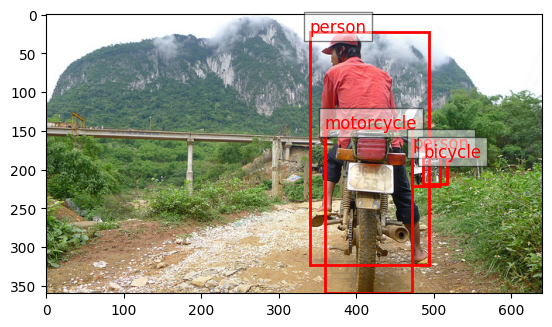

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the COCO annotation JSON file
with open('/content/annotations_trainval2014/annotations/instances_val2014.json') as f:
    coco_data = json.load(f)

# Extract class names
categories = coco_data['categories']
class_names = {cat['id']: cat['name'] for cat in categories}

# Print class names
print("Class names:", class_names)

# Load image and its annotations
image_id = coco_data['images'][0]['id']
image_path = 'COCO_val2014/val2014/' + coco_data['images'][0]['file_name']
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]

# Open the image
image = Image.open(image_path)
fig, ax = plt.subplots(1)
ax.imshow(image)

# Visualize the annotations
for ann in annotations:
    bbox = ann['bbox']
    class_id = ann['category_id']
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(bbox[0], bbox[1], class_names[class_id], fontsize=12, color='r', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [ ]:
import json
from collections import Counter

# Load the COCO annotation JSON file
with open('/content/annotations_trainval2014/annotations/instances_val2014.json') as f:
    coco_data = json.load(f)

# Select the class IDs you want to analyze
selected_class_ids = [1, 2, 3, 4, 6, 15, 62, 63, 65, 67, 70, 81, 82]

# Filter annotations for the selected classes
filtered_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] in selected_class_ids]

# Count the number of samples for each selected class
class_counts = Counter([ann['category_id'] for ann in filtered_annotations])

# Map class IDs to class names
class_names = {cat['id']: cat['name'] for cat in coco_data['categories']}

# Display the counts for the selected classes
for class_id, count in class_counts.items():
    print(f"Class: {class_names[class_id]}, Count: {count}")


Class: couch, Count: 1927
Class: chair, Count: 13135
Class: dining table, Count: 5244
Class: bicycle, Count: 2474
Class: car, Count: 15014
Class: motorcycle, Count: 3075
Class: bus, Count: 2027
Class: person, Count: 88153
Class: bed, Count: 1450
Class: refrigerator, Count: 888
Class: bench, Count: 3500
Class: toilet, Count: 1463
Class: sink, Count: 1902


In [ ]:
len(list(class_names.keys()))

80

In [ ]:
import json
import os
import random
import shutil
from PIL import Image
from collections import defaultdict

def convert_to_yolo(bbox, img_width, img_height):
    # COCO format: [x_min, y_min, width, height]
    x_min, y_min, width, height = bbox
    # Convert to YOLO format: [x_center, y_center, width, height]
    x_center = x_min + width / 2
    y_center = y_min + height / 2
    return [x_center / img_width, y_center / img_height, width / img_width, height / img_height]

# Load the COCO annotation JSON file
with open('/content/annotations_trainval2014/annotations/instances_val2014.json') as f:
    coco_data = json.load(f)

# Select the class IDs you want to analyze
selected_class_ids = [1, 2, 3, 4, 6, 15, 62, 63, 65, 67, 70, 81, 82]

# Filter annotations for the selected classes
filtered_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] in selected_class_ids]

# Group annotations by class ID
annotations_by_class = defaultdict(list)
for ann in filtered_annotations:
    annotations_by_class[ann['category_id']].append(ann)

# Randomly sample up to 1000 annotations for each class
sampled_annotations = []
for class_id, annotations in annotations_by_class.items():
    sampled_annotations.extend(random.sample(annotations, min(1000, len(annotations))))

# Create directories for the selected images and YOLO labels
os.makedirs('selected_images', exist_ok=True)
os.makedirs('yolo_labels', exist_ok=True)

# Process each sampled annotation
processed_image_ids = set()
for ann in sampled_annotations:
    img_id = ann['image_id']
    if img_id not in processed_image_ids:
        processed_image_ids.add(img_id)
        image_info = next(img for img in coco_data['images'] if img['id'] == img_id)
        img_path = '/content/COCO_val2014/val2014/' + image_info['file_name']

        # Copy the image to the new directory
        shutil.copy(img_path, 'selected_images/')

        # Open the image to get its dimensions
        img = Image.open(img_path)
        img_width, img_height = img.size

        # Get annotations for the current image
        img_annotations = [ann for ann in filtered_annotations if ann['image_id'] == img_id]

        # Convert annotations to YOLO format and save them
        yolo_labels = []
        for ann in img_annotations:
            bbox = ann['bbox']
            class_id = ann['category_id']
            yolo_bbox = convert_to_yolo(bbox, img_width, img_height)
            yolo_labels.append(f"{class_id - 1} {' '.join(map(str, yolo_bbox))}\n")

        # Write YOLO labels to a new file
        label_path = f"yolo_labels/{os.path.splitext(image_info['file_name'])[0]}.txt"
        with open(label_path, 'w') as label_file:
            label_file.writelines(yolo_labels)


In [ ]:
len(os.listdir("selected_images"))

9108

In [ ]:
import os
from collections import Counter

# Directory containing YOLO label files
labels_directory = 'yolo_labels'

# Initialize a counter for class occurrences
class_counter = Counter()

# Process each label file in the directory
for label_file in os.listdir(labels_directory):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_directory, label_file), 'r') as file:
            for line in file:
                class_id = int(line.split()[0])
                class_counter[class_id] += 1

# Display the number of samples for each class
for class_id, count in class_counter.items():
    print(f"Class ID: {class_id}, Count: {count}")


Class ID: 1, Count: 2030
Class ID: 0, Count: 27489
Class ID: 61, Count: 7686
Class ID: 14, Count: 2273
Class ID: 66, Count: 2492
Class ID: 64, Count: 1122
Class ID: 80, Count: 1484
Class ID: 62, Count: 1375
Class ID: 81, Count: 888
Class ID: 2, Count: 7590
Class ID: 5, Count: 1544
Class ID: 69, Count: 1223
Class ID: 3, Count: 2437


In [ ]:
import os
import shutil

def filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, classes_to_remove):
    os.makedirs(output_dir_label, exist_ok=True)
    os.makedirs(output_dir_img, exist_ok=True)

    # if os.path.exists(data_yaml_path_input):
    #     shutil.copy(data_yaml_path_input, data_yaml_path_output)
    # else:
    #     print(f'The file {data_yaml_path_input} does not exist')

    for input_dir_label, input_dir_img in zip(input_dirs_label, input_dirs_img):
        for filename in os.listdir(input_dir_label):
            if filename.endswith('.txt'):
                label_path = os.path.join(input_dir_label, filename)
                image_path = os.path.join(input_dir_img, filename.replace('.txt', '.jpg'))

                if not os.path.exists(image_path):
                    continue

                with open(label_path, 'r') as file:
                    lines = file.readlines()

                filtered_lines = [line for line in lines if int(line.split()[0]) not in classes_to_remove]

                if filtered_lines:
                    with open(os.path.join(output_dir_label, filename), 'w') as file:
                        file.writelines(filtered_lines)
                    shutil.copy(image_path, output_dir_img)
                else:
                    print(f'Removed {image_path}')



In [ ]:
all_indexes = list(class_names.keys())
indexes_classes_to_remove = [x for x in all_indexes if x not in selected_class_ids]

In [ ]:
len(indexes_classes_to_remove) + len(selected_class_ids)

80

In [ ]:
input_dirs_label = ['/content/yolo_labels']
input_dirs_img = ['/content/COCO_val2014/val2014']
output_dir_label = "/content/fixed_coco/labels"
output_dir_img = "/content/fixed_coco/images"
filter_yolo_classes_TTV(input_dirs_label, input_dirs_img, output_dir_label, output_dir_img, indexes_classes_to_remove)

Removed /content/COCO_val2014/val2014/COCO_val2014_000000143767.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000488563.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000350975.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000548706.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000469046.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000478490.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000314779.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000464176.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000262347.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000396269.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000481035.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000334073.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000563762.jpg
Removed /content/COCO_val2014/val2014/COCO_val2014_000000438253.jpg
Removed /content/COCO_val2014/val2014/COCO_val20

In [ ]:
len(os.listdir(output_dir_label))

7983

In [ ]:
our_DS_classes = ["bed",
                  "desk",
                  "table",
                  "door",
                  "fridge",
                  "toilet",
                  "sofa",
                  "sink",
                  "microwave",
                  "chair",
                  "fan",
                  "closet",
                  "stairs",
                  "crosswalk",
                  "pedestrian Traffic Light (walk)",
                  "pedestrian Traffic Light (stop)",
                  "person",
                  "bicycle",
                  "car",
                  "motorcycle",
                  "bus",
                  "bench",
                  "faces",
                  "A",
                  "B",
                  "W",
                  "Y"]

In [ ]:
index_mapping = {1:our_DS_classes.index("person"),
                 2:our_DS_classes.index("bicycle"),
                 3:our_DS_classes.index("car"),
                 4:our_DS_classes.index("motorcycle"),
                 6:our_DS_classes.index("bus"),
                 15:our_DS_classes.index("bench"),
                 62:our_DS_classes.index("chair"),
                 63:our_DS_classes.index("sofa"),
                 65:our_DS_classes.index("bed"),
                 67:our_DS_classes.index("table"),
                 70:our_DS_classes.index("toilet"),
                 81:our_DS_classes.index("sink"),
                 82:our_DS_classes.index("fridge")}

In [ ]:
update_indices("/content/fixed_coco/labels", index_mapping)

In [ ]:
main_folder_path = '/content/fixed_coco'
output_zip_file = 'coco_subset.zip'
zip_folders(main_folder_path, output_zip_file)

In [ ]:
# shutil.rmtree("yolo_labels")

In [ ]:
src_file_path = '/content/coco_subset.zip'
dest_file_path = '/content/drive/MyDrive/smart_glasses/coco_subset.zip'

os.makedirs(os.path.dirname(dest_file_path), exist_ok=True)

shutil.move(src_file_path, dest_file_path)

'/content/drive/MyDrive/smart_glasses/coco_subset.zip'

In [ ]:
zip_size = os.path.getsize(dest_file_path)
print(f'Zip file size: {zip_size} bytes')

Zip file size: 1287862197 bytes
